In [1]:
from prophet import Prophet
import pandas as pd

def make_df(filename, ID, slicing = 0):
    df = pd.read_csv(filename)
    
    if slicing:
        l = len(df)
        df = df.head(slicing)
        print(f'sliced into {len(df)} out of {l} data.')
        
    df.rename(columns={'Date' : 'ds' , 'S' : 'y'}, inplace = True)
    
    df['ds'] = pd.to_datetime(df['ds'])
    df.set_index('ds', inplace = True)
    df_daily = df.resample('D').mean()
    
    df_daily['H'].fillna(method='ffill', inplace = True)
    df = df_daily.reset_index()
    df['ID'] = ID
    
    df = df[['ds','y','H','ID']]
    
    return df

# 298 기간

df1 = make_df('H-S_seq_1.csv',ID = 'data1')
df2 = make_df('H-S_seq_2.csv',ID = 'data2')
df3 = make_df('H-S_seq_3.csv',ID = 'data3')
df4 = make_df('H-S_seq_4.csv',ID = 'data4')
df5 = make_df('H-S_seq_5.csv',ID = 'data5')
df6 = make_df('H-S_seq_6.csv',ID = 'data6')
df7 = make_df('H-S_seq_7.csv',ID = 'data7')
df8 = make_df('H-S_seq_8.csv',ID = 'data8')
df3_test = make_df('H-S_seq_3.csv',ID = 'data3', slicing = 5)
# df2_test = make_df('H-S_seq_2.csv',ID = 'data2', slicing = 5)

df = pd.concat((df1,df2,df4,df6,df7,df8))

sliced into 5 out of 62 data.


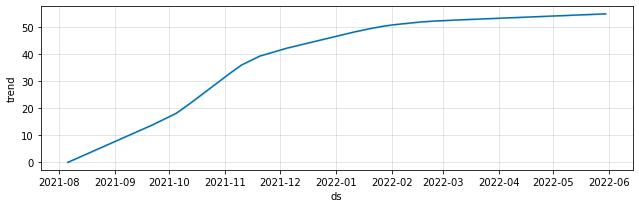

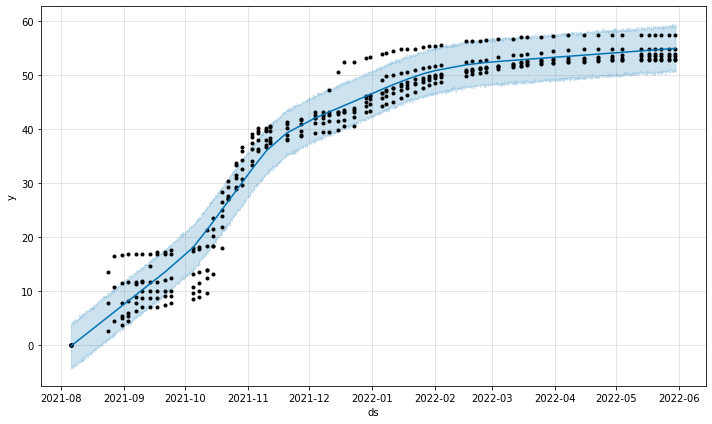

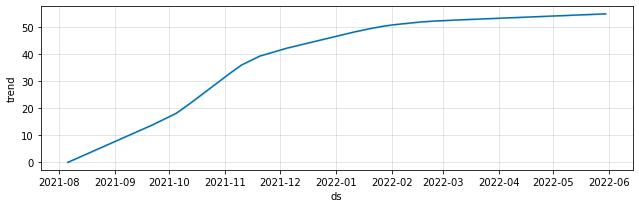

In [5]:
m = Prophet(weekly_seasonality=False, yearly_seasonality=False,daily_seasonality=False)
# m.add_regressor('H')
m.fit(df)
# future = m.make_future_dataframe(periods=10)
forecast = m.predict(df)
m.plot(forecast)

m.plot_components(forecast)

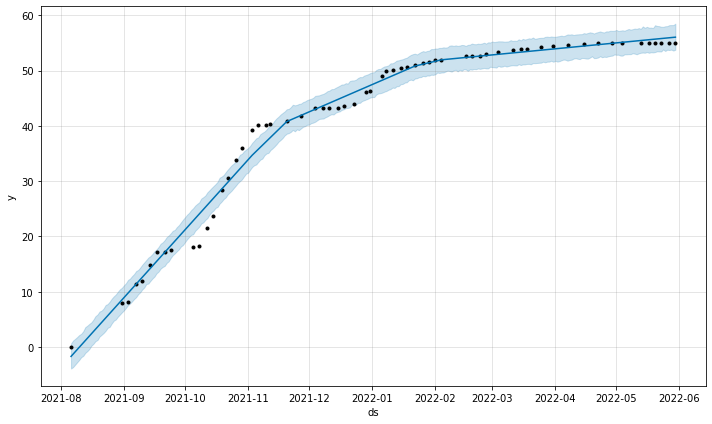

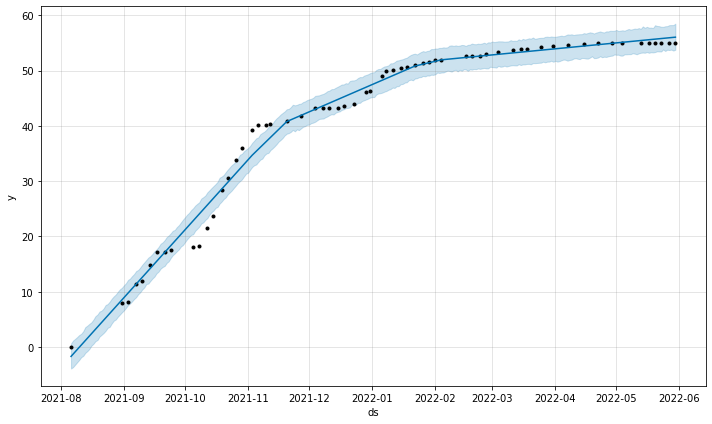

In [13]:
m = Prophet(weekly_seasonality=False, yearly_seasonality=False,daily_seasonality=False)
m.fit(df1)
f= m.predict(df1)
m.plot(f)

In [21]:
def warm_start_params(m):
    res = {}
    for pname in ['k', 'm', 'sigma_obs']:
        if m.mcmc_samples == 0:
            res[pname] = m.params[pname][0][0]
        else:
            res[pname] = np.mean(m.params[pname])
    for pname in ['delta', 'beta']:
        if m.mcmc_samples == 0:
            res[pname] = m.params[pname][0]
        else:
            res[pname] = np.mean(m.params[pname], axis=0)
    return res

m2 = Prophet(weekly_seasonality=False, yearly_seasonality=False,daily_seasonality=False)
m2.fit(df3_test, init=warm_start_params(m)) 
f2 = m2.predict(df3_test)
m2.plot(df3_test)

INFO:prophet:n_changepoints greater than number of observations. Using 3.


RuntimeError: mismatch in dimension declared and found in context; processing stage=parameter initialization; variable name=delta; position=0; dims declared=(3); dims found=(25)